# ADA - CopyPaste

## 1. Imports & Initializations

In [173]:
#Basics
import pandas as pd
import numpy as np

#Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')

#OS
import os
directory = os.getcwd()
list_of_files = os.listdir(directory)

## 2. Loading & Writting

In [101]:
#From CSV
path = "Data/microbiome.csv"
df = pd.read_csv(path, header=None, sep=',', na_values=['?', -9999], index_col=['Taxon','Patient']) #just one if no multi-index

#From Pickle
pd.read_pickle("df_pickle")

#From excel
df = pd.read_excel('Data/microbiome/MID2.xls', sheetname='Sheet 1',index_col=0, header=None)

#From scratch:
df = pd.DataFrame({'feature1':[632, 1638, 569, 115, 433, 1130, 754, 555],
                   'feature2':[1, 1, 1, 1, 2, 2, 2, 2],
                   'feature3':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
                             'Bacteroidetes', 'Firmicutes', 'Proteobacteria',
                             'Actinobacteria', 'Bacteroidetes']})

df_num = df[['feature1','feature2']] #somethings can only be done in numeric

#To CSV
df.to_csv("df.csv")

#To Pickle
df.to_pickle("df_pickle")


## 3. Porperties and Methods

In [195]:
# Of DataFrame
df.head()
df.tail()
df.shape
df.columns
df.dtypes
df.index
df.index.is_unique #check for unique index
df.describe()
df.isin(['Firmicutes','Bacteroidetes']) # Also works with intergers. Returns True/False dataframe
df.sort_index(ascending=False) #descending order
df.sort_values(ascending=[False,True], by=['feature1', 'feature2']) #double sorting
df.reset_index()
df1 = df_num.sum(axis=1) #sums through rows
df1 = df_num.corr()
df1 = df.transpose()
df1 = pd.get_dummies(df,columns=['feature3'])
s1 = pd.Categorical(df.feature3)
df1 = df.sample(n=10, replace=False)

# Of Series
s = df.feature1 #s == Series
s.values
s.isnull()
s.notnull()
s.astype(str)
s.is_unique
s.unique() #returns the 'set'
s.value_counts()
s.max()
s.min()
s.sum()
s.mean()
s.sort_values(ascending=False) #descending order
s.astype(float).round(3) #three decimals
idx = s.rank(method='first', ascending=False)
s.replace(0, 1e-6)
l = s.tolist() #values to list

# Of Lists
l2 = list(s.values)
l2.append(1) #adds 1 at the end
l2.pop()#pops the 1
l2.count(10) #counts how many 10s

# Of Strings
string = 'abcd'
string.endswith('cd') #True/False
string.startswith('ab') #True/False
'bc' in string #True/False
str2 = string + 'e'
str2 = "abcd{0}".format('e') #allows numeric
string.lower()
string.upper()
string.find('b') #returns first index, -1 on failure
string.split('b')

['a', 'cd']

## 4. Handling Data

In [200]:
# Assignation
df['new'] = 0 #initialization of column to 0
df.set_value(5, 'feature1', 10) #(index,column,value)
s[1:4] = 10 #affects the dataframe because s is defined by pointer.

# Selections
th = 500 #threshold

s = df['feature1']
s[s>th]

df1 = df.copy() #No pointer
df1 = df.ix[:,['feature1','feature2']]
df1 = df.ix[[2,3],0:2] # Like matrix
df1 = df.ix[2:,'feature1':'feature3'] # Like matrix

df[df.feature1>th]
df.query('feature1>@th')

# Discretization
df1 = pd.cut(df.feature1, [0,20,600], labels=['0-20','20-600'])
# df1 = pd.qcut(df.feature1,4) #percentiles

# Clean
df1 = df[pd.isnull(df)]
df1 = df.drop('feature3', axis=1) #1 for column, 0 for row
df.dropna(how='any', subset=['feature1','feature2'], axis=0, inplace=True) # 0 rows, 1 columns. how={‘any’, ‘all’}. thresh=xxx 
df.fillna(0, inplace=True) #fill with 0s
df.fillna(method='bfill', inplace=True) #fills with interpolation
df2 = df.drop_duplicates(subset=['feature1','feature2'],keep='first') # keep : {‘first’, ‘last’, False}

# Merging and joining
df2 = pd.concat([df,df1], axis=0) # 0 pastes on the bottom, 1 pastes on the right. join : {‘inner’, ‘outer’}, default ‘outer’. ignore_index :True/False
df2 = pd.merge(df, df1, left_on='feature1', right_on='feature1', sort=False) # how:{'left', 'right', 'outer', 'inner'}.

#Grouping
df1 = df.groupby('feature3').feature2.mean()

# Reindex
df1 = df.rename(index={4: 'New cases', 1: 'Total deaths'})
df1 = df.rename(columns={'feature3':'Total deaths'})
df1 = df.set_index(['feature3','feature2'])
    # df1 = df1.ix[('Firmicutes',2),:] #now selection with parenthesis in multi-index
df2 = df1['feature1'].unstack('feature2') #from multiple index with 1 obs, to matrix with feature3 as rows and feature2 as columns
df2 = df.pivot(index='feature3', columns='feature2', values='feature1') #same result as the previous 2 lines.
#pivot_table has more aggregation functs.
df1 = df1.reset_index() #need to copy

df2

C:\Users\dunay\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


feature2,1,2
feature3,,
Actinobacteria,10,754
Bacteroidetes,10,555
Firmicutes,632,433
Proteobacteria,10,10


## 5. Plotting

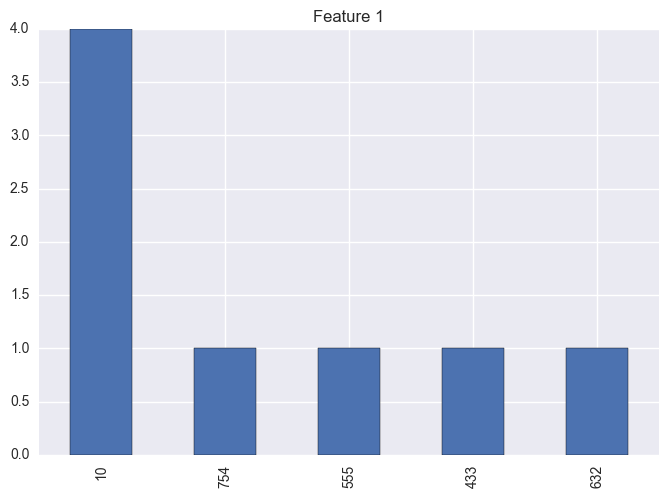

In [205]:
s.hist(bins=10) #Hist
df.feature1.value_counts().plot(kind='bar', title='Feature 1') #Barplot


## Numpy

In [204]:
np.log(s)

np.concatenate([np.random.random(5), np.random.random(5)]) #row-wise. uniform dist. 0-1
np.r_[np.random.random(5), np.random.random(5)] #same as before
np.c_[np.random.random(5), np.random.random(5)] #column-wise

new_order = np.random.permutation(len(df))

np.arange(12).reshape(( 4, 3)) #arrange is [0 ... 11], reshape gives form

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

## Extras with examples

In [ ]:
# List Comprehension
squares = [x**2 for x in range(10)]
#With lamda, map
squares = map(lambda x: x**2, range(10))

#Map
treatment_map = {'Placebo': 0, '5000U': 1, '10000U': 2}
cdystonia['treatment'] = cdystonia.treat.map(treatment_map)
#or...
cdystonia2.treat.replace({'Placebo': 0, '5000U': 1, '10000U': 2})

# Apply
df.apply(np.median,axis=0) #median of each column. 1 for rows
df.apply(np.sum, axis=0) # equiv to df.sum(0)
#With lambda - range of each column
df_range = lambda x: x.max() - x.min() #here lambda takes one whole column. If applied to a Series, just one value.
df.apply(df_range)

# Datetime
date = pd.to_datetime(df.feature1)
year = date.year
month = date.month
hour = date.hour

In [153]:
# Loop with zip + print with format
questions = ['name', 'quest', 'favorite color']
answers = ['lancelot', 'the holy grail', 'blue']
for q, a in zip(questions, answers):
    print('What is your {0}?  It is {1}.'.format(q, a))

What is your name?  It is lancelot.
What is your quest?  It is the holy grail.
What is your favorite color?  It is blue.


In [ ]:
# |Groupby|
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)
#print
for patient, group in cdystonia_grouped:
    print('patient', patient)
    print('group', group)
#split-apply-combine
cdystonia_grouped.agg(np.mean)
cdystonia_grouped.mean().add_suffix('_mean')
#with lambda
normalize = lambda x: (x - x.mean())/x.std()
cdystonia_grouped.transform(normalize)
#with apply
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]